In [36]:
from numpy import*
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
%matplotlib inline

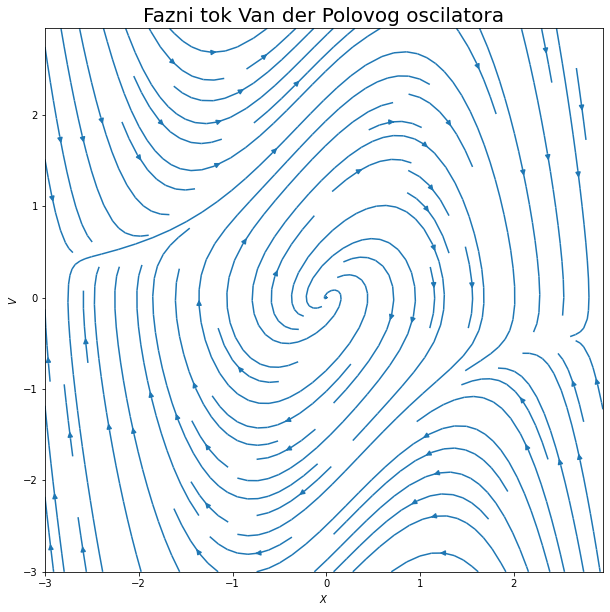

In [84]:
#Korisne funkcije
def van_der_pol(state,t,mu = 1):
    """Generira diferencijalnu jednadžbu"""
    x = state[0]
    dx = state[1]
    d2x = -x  + mu*( 1 - x**2 )*dx
    
    return array([dx,d2x])
dt = 0.01   

def vector_field(x,dx,dt = dt,mu = 1):
    
    ux = dx
    uy = -x + mu*(1 - x**2)*dx
    return ux,uy


x_mesh = arange(-3,3,5e-2)
y_mesh = arange(-3,3,5e-2)
Npts = len(x_mesh)
u = zeros([Npts,Npts])
v = zeros([Npts,Npts])

for i in range(Npts):
    for j in range(Npts):
        u[j,i],v[j,i] = vector_field(x_mesh[i],y_mesh[j])

        
X,Y = meshgrid(x_mesh,y_mesh) 
frame,fig =plt.subplots(figsize = (10,10))
fig.streamplot(x_mesh,y_mesh,u,v)
# q = fig.quiver(X[::5,::5],Y[::5,::5],u[::5,::5],v[::5,::5],units = "width",color = "blue",label ="fazni tok")
# qk = fig.quiverkey(q, 0.9, 0.9, 2,label = "")
#fig.legend()
fig.set_title("Fazni tok Van der Polovog oscilatora",fontsize = 20)
fig.set_xlabel(r"$X$")
fig.set_ylabel(r"$V$")
print()

In [38]:
#Definiranje modela
#Najbolja arhietktura 2x8x8x2
model= keras.Sequential([layers.BatchNormalization(input_shape = [2]),
                        layers.Dense(8,activation = "swish"),
                        layers.BatchNormalization(),
                        #layers.Dropout(rate = 0.1),
                        
#                         layers.Dense(5,activation = "swish"),
#                         layers.BatchNormalization(),
#                         #layers.Dropout(rate =0.05 ),
                          
#                         layers.Dense(8,activation = "swish"),
#                         layers.BatchNormalization(),
#                          layers.Dropout(rate = 0.1),
                         
#                         layers.Dense(8,activation = "swish"),
#                         layers.BatchNormalization(),
#                         layers.Dropout(rate = 0.1),
                         
#                         layers.Dense(8,activation = "swish"),
#                         layers.BatchNormalization(),
#                         layers.Dropout(rate = 0.1),
                       
                        layers.Dense(8,activation = "swish"),
                        layers.BatchNormalization(),
                        #layers.Dropout(rate = 0.1),
                        layers.Dense(2)])

#Optimizaciski algoritam
opt =keras.optimizers.Adam(
    learning_rate=0.002)
#mse - Mean square error - to želiš minimizirati
model.compile(optimizer = opt,
               loss = 'mse')


In [39]:
#Generiranje podataka za učenje modela
#Za provjeru i za testiranje modela

Ntrain = 600 #Originalno 600
trainX =  random.uniform(-3,3,(Ntrain,2))
trainY = list()

Ntest = 300
testX =  random.uniform(-3,3,(Ntest,2))
testY = list()

Nvalid = 300
validX =  random.uniform(-3,3,(Nvalid,2))
validY = list()

for i in range(Ntrain):
    trainY.append(vector_field(trainX[i][0],trainX[i][1]))    
for i in range(Ntest):
    testY.append(vector_field(testX[i][0],testX[i][1]))
for i in range(Nvalid):
    validY.append(vector_field(validX[i][0],validX[i][1]))
trainY = array(trainY)
testY = array(testY)
validY = array(validY)

In [40]:
#Treniranje modela
history = model.fit(trainX,trainY,
                   validation_data=(validX,validY),
                    batch_size = 64,
                    epochs = 500
                   )

Epoch 1/500
10/10 [==============================] - 1s 15ms/step - loss: 6.2124 - val_loss: 3.9762
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 4.0446 - val_loss: 3.6470
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 2.1281 - val_loss: 3.3963
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 1.1919 - val_loss: 3.2336
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 1.0919 - val_loss: 3.1339
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 0.9529 - val_loss: 3.0813
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.9190 - val_loss: 3.0453
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.8633 - val_loss: 2.9991
Epoch 9/500
10/10 [==============================] - 0s 4ms/step - loss: 0.7094 - val_loss: 2.9637
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7229 - val_loss: 2.9240
Epoch 11

10/10 [==============================] - 0s 4ms/step - loss: 0.2385 - val_loss: 0.0949
Epoch 84/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2147 - val_loss: 0.0893
Epoch 85/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1426 - val_loss: 0.0836
Epoch 86/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1780 - val_loss: 0.0778
Epoch 87/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1496 - val_loss: 0.0744
Epoch 88/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1439 - val_loss: 0.0708
Epoch 89/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1966 - val_loss: 0.0650
Epoch 90/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1393 - val_loss: 0.0609
Epoch 91/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1666 - val_loss: 0.0689
Epoch 92/500
10/10 [==============================] - 0s 3ms/step - loss: 0.3024 - val_loss: 0.0549
Epoch 93/500


10/10 [==============================] - 0s 3ms/step - loss: 0.1281 - val_loss: 0.0251
Epoch 165/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1340 - val_loss: 0.0304
Epoch 166/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1226 - val_loss: 0.0202
Epoch 167/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1494 - val_loss: 0.0224
Epoch 168/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2109 - val_loss: 0.0210
Epoch 169/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0867 - val_loss: 0.0179
Epoch 170/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1086 - val_loss: 0.0273
Epoch 171/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1122 - val_loss: 0.0232
Epoch 172/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2283 - val_loss: 0.0244
Epoch 173/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1732 - val_loss: 0.0194
Epoc

10/10 [==============================] - 0s 3ms/step - loss: 0.1270 - val_loss: 0.0170
Epoch 246/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1566 - val_loss: 0.0180
Epoch 247/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2386 - val_loss: 0.0163
Epoch 248/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1458 - val_loss: 0.0178
Epoch 249/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1541 - val_loss: 0.0213
Epoch 250/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1366 - val_loss: 0.0195
Epoch 251/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1311 - val_loss: 0.0275
Epoch 252/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1063 - val_loss: 0.0181
Epoch 253/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1174 - val_loss: 0.0214
Epoch 254/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1277 - val_loss: 0.0189
Epoc

10/10 [==============================] - 0s 6ms/step - loss: 0.2226 - val_loss: 0.0251
Epoch 327/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2185 - val_loss: 0.0415
Epoch 328/500
10/10 [==============================] - 0s 5ms/step - loss: 0.1812 - val_loss: 0.0234
Epoch 329/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2434 - val_loss: 0.0155
Epoch 330/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1715 - val_loss: 0.0182
Epoch 331/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1176 - val_loss: 0.0236
Epoch 332/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1746 - val_loss: 0.0223
Epoch 333/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1070 - val_loss: 0.0205
Epoch 334/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0652 - val_loss: 0.0306
Epoch 335/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1227 - val_loss: 0.0245
Epoc

10/10 [==============================] - 0s 4ms/step - loss: 0.1454 - val_loss: 0.0172
Epoch 408/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1309 - val_loss: 0.0180
Epoch 409/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1286 - val_loss: 0.0158
Epoch 410/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1557 - val_loss: 0.0179
Epoch 411/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2073 - val_loss: 0.0234
Epoch 412/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0962 - val_loss: 0.0224
Epoch 413/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1010 - val_loss: 0.0119
Epoch 414/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1467 - val_loss: 0.0103
Epoch 415/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1069 - val_loss: 0.0138
Epoch 416/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1203 - val_loss: 0.0120
Epoc

10/10 [==============================] - 0s 4ms/step - loss: 0.1201 - val_loss: 0.0187
Epoch 489/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1338 - val_loss: 0.0206
Epoch 490/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1795 - val_loss: 0.0171
Epoch 491/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1358 - val_loss: 0.0174
Epoch 492/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1897 - val_loss: 0.0147
Epoch 493/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1451 - val_loss: 0.0194
Epoch 494/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2010 - val_loss: 0.0189
Epoch 495/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0904 - val_loss: 0.0215
Epoch 496/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2202 - val_loss: 0.0183
Epoch 497/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1441 - val_loss: 0.0255
Epoc

10/10 [==============================] - 0s 528us/step - loss: 0.0267


0.026738500222563744

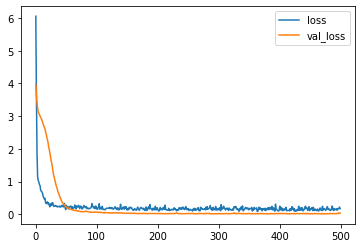

In [41]:
#Točnost modela
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
model.evaluate(testX,testY)

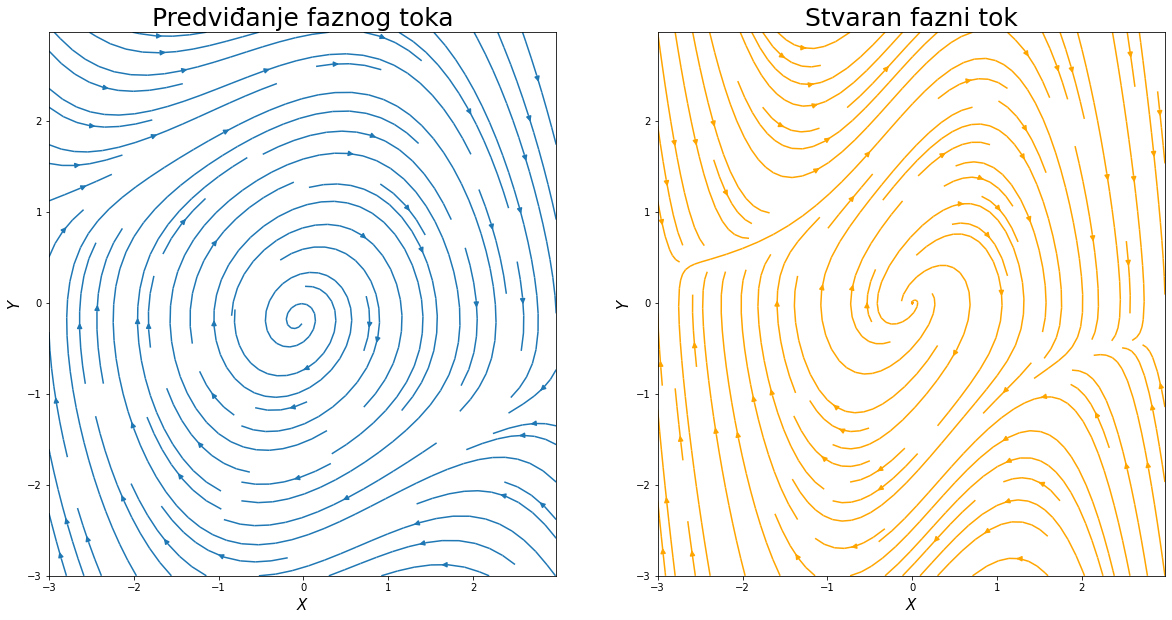

In [85]:
#Provjera kako model radi na nasumično odabranim točkama
#Cilj mu je pogoditi fazni tok u točku odnosno diferencijanu jednadžbu
x_mesh = arange(-3,3,6/300)
y_mesh = arange(-3,3,6/300)
u = zeros((len(x_mesh),len(x_mesh)))
v = zeros((len(x_mesh),len(x_mesh)))

data =[]
for i in range(len(x_mesh)):
    for j in range(len(y_mesh)):
        data.append([x_mesh[j],y_mesh[i]])   
        
        
data = array(data)
pred = model.predict(data)
pred =pred.reshape(300,300,2)


for i in range(len(x_mesh)):
    for j in range(len(y_mesh)):
        u[j,i],v[j,i] = vector_field(x_mesh[i],y_mesh[j])


frame,fig = plt.subplots(1,2,figsize = (20,10))
fig[0].streamplot(x_mesh,y_mesh,pred[:,:,0],pred[:,:,1],density = 1)
fig[1].streamplot(x_mesh,y_mesh,u,v,density = 1,color ="orange")
fig[0].set_title("Predviđanje faznog toka",fontsize = 25)
fig[1].set_title("Stvaran fazni tok",fontsize = 25)
fig[0].set_xlabel(r"$X$",fontsize = 15)
fig[0].set_ylabel(r"$Y$",fontsize = 15)
fig[1].set_xlabel(r"$X$",fontsize = 15)
fig[1].set_ylabel(r"$Y$",fontsize = 15)
print()
frame.savefig("Usporedba")


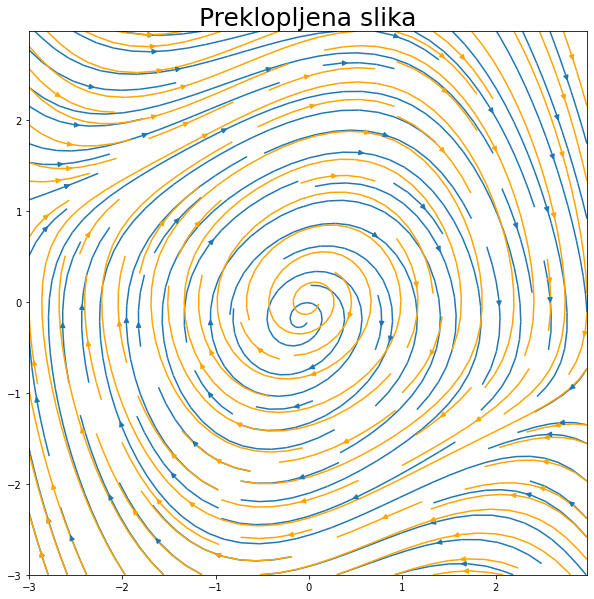

In [43]:
frame,fig = plt.subplots(figsize = (10,10))
dns = 1
fig.streamplot(x_mesh,y_mesh,pred[:,:,0],pred[:,:,1],density = dns)
fig.streamplot(x_mesh,y_mesh,u,v,density = dns,color ="orange")

fig.set_title("Preklopljena slika",fontsize = 25)
frame.savefig("Preklop_mali")


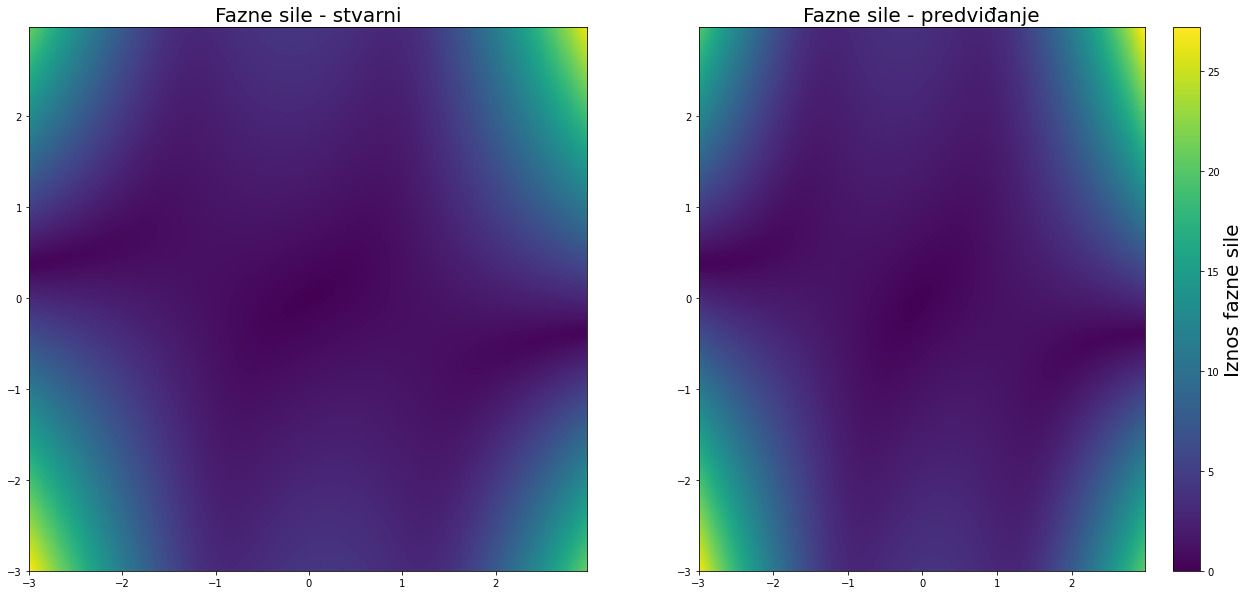

In [11]:
size_real = zeros((300,300))
size_neural = zeros((300,300))

for i in range(300):
    for j in range(300):
        size_real[j,i] = sqrt(u[j,i]**2 + v[j,i]**2)
        size_neural[j,i] = sqrt(pred[j,i,0]**2 + pred[j,i,1]**2)
        
X,Y = meshgrid(x_mesh,y_mesh)
frame,fig =plt.subplots(1,2,figsize =(22,10))
mp = fig[0].pcolor(X,Y,size_real)
fig[1].pcolor(X,Y,size_neural)
cs = frame.colorbar(mp,cmap='jet')
cs.set_label('Iznos fazne sile',size=20)
fig[0].set_title("Fazne sile - stvarni",fontsize =20)
fig[1].set_title("Fazne sile - predviđanje",fontsize =20)
frame.savefig("Iznos_faznih sila")

In [ ]:
x = 0.1
y = 0.3
X,Y = [],[]
xpred,ypred = x,y
Xpred,Ypred  = [],[]
dt = 0.001
for i in range(15_000):
    F = vector_field(x,y)
    x += F[0]*dt
    y += F[1]*dt
    FN = model(array([xpred,ypred]).reshape(1,2),training=False).numpy()
    xpred += FN[0][0]*dt
    ypred += FN[0][1]*dt
    X.append(x)
    Y.append(y)
    Xpred.append(xpred)
    Ypred.append(ypred)

    
frame,fig = plt.subplots(figsize = (10,10))    
fig.plot(X,Y,label = "Stvarna putanja")
fig.plot(Xpred,Ypred,label = "Predviđena putanja")
fig.legend(fontsize = 15)

In [121]:
#Učenje kontinuacije dinamike
# #Podatke uzima s jedne krivulje
t = arange(0,15,1e-2)
L = len(t)
Npts = 500
initial_train = [0.1,0.1]
train_traj = odeint(van_der_pol,initial_train,t)
X_train = train_traj[::2,:]
#Y_train = zeros((Npts,2))


initial_val = [0.2,0.2]
val_traj = odeint(van_der_pol,initial_val,t)
X_val = val_traj[::2,:]
#Y_val = zeros((Npts,2))



initial_test = [-0.21,0.15]
test_traj = odeint(van_der_pol,initial_test,t)
X_test = test_traj[::2,:]
#Y_test = zeros((Npts,2))

Y_train,Y_test,Y_val = [],[],[]

for i in range(len(X_train)):
#     Y_train[i,:] += vector_field(X_train[i,0],X_train[i,1])
#     Y_val[i,:] += vector_field(X_val[i,0],X_val[i,1])
#     Y_test[i,:] += vector_field(X_test[i,0],X_test[i,1])
    Y_train.append(vector_field(X_train[i,0],X_train[i,1]))
    Y_test.append(vector_field(X_test[i,0],X_test[i,1]))
    Y_val.append(vector_field(X_val[i,0],X_val[i,1]))
    
Y_train = array(Y_train)
Y_test = array(Y_test)
Y_val = array(Y_val)


1000

In [137]:
# #Definiranje modela2 koji predviđa trajektoriju u naprijed
act = "swish"
model2= keras.Sequential([layers.BatchNormalization(input_shape = [2]),
                        layers.Dense(8,activation = act),
                         layers.BatchNormalization(),
#                         layers.Dropout(rate = 0.05),
                        
#                         layers.Dense(10,activation = "sigmoid"),
#                         layers.BatchNormalization(),
#                          layers.Dropout(rate =0.05 ),
                          
#                         layers.Dense(8,activation = act),
#                         layers.BatchNormalization(),
#                           layers.Dropout(rate = 0.05),
                       
                        layers.Dense(8,activation = act),
                        layers.BatchNormalization(),
                        #layers.Dropout(rate = 0.05),
                        layers.Dense(2)])

#Optimizaciski algoritam
opt =keras.optimizers.Adam(
    learning_rate=0.002)
#mse - Mean square error - to želiš minimizirati
model2.compile(optimizer = opt,
               loss = 'mse')


early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.1, # minimium amount of change to count as an improvement
    patience=100, # how many epochs to wait before stopping
    restore_best_weights=True,
)




In [138]:
history2 = model2.fit(X_train,Y_train,
                      validation_data = (X_val,Y_val),
                      batch_size = 64,
                      epochs = 1000,
                   callbacks =[early_stopping]
)




Epoch 1/1000
12/12 [==============================] - 1s 14ms/step - loss: 1.4588 - val_loss: 1.4072
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.0903 - val_loss: 1.3774
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.7988 - val_loss: 1.3502
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.6080 - val_loss: 1.3202
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.5625 - val_loss: 1.2815
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.4679 - val_loss: 1.2464
Epoch 7/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.4587 - val_loss: 1.2130
Epoch 8/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.4459 - val_loss: 1.1796
Epoch 9/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.4165 - val_loss: 1.1494
Epoch 10/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.4155 - val_loss: 1.117

12/12 [==============================] - 0s 4ms/step - loss: 0.0989 - val_loss: 0.0221
Epoch 83/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0690 - val_loss: 0.0166
Epoch 84/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1040 - val_loss: 0.0207
Epoch 85/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.0826 - val_loss: 0.0166
Epoch 86/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1537 - val_loss: 0.0239
Epoch 87/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0980 - val_loss: 0.0143
Epoch 88/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0829 - val_loss: 0.0156
Epoch 89/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1088 - val_loss: 0.0260
Epoch 90/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1222 - val_loss: 0.0124
Epoch 91/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.1006 - val_loss: 0.0151
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0775 - val_loss: 0.0083
Epoch 163/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0739 - val_loss: 0.0070
Epoch 164/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0489 - val_loss: 0.0083
Epoch 165/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0642 - val_loss: 0.0111
Epoch 166/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.0090
Epoch 167/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0730 - val_loss: 0.0140
Epoch 168/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.0765 - val_loss: 0.0118
Epoch 169/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.0648 - val_loss: 0.0148
Epoch 170/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.0609 - val_loss: 0.0170
Epoch 171/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.0545 - val_loss: 0.

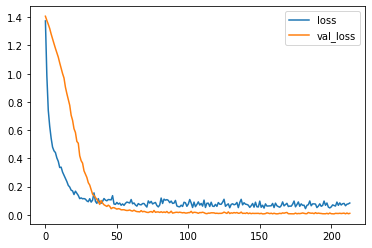

In [139]:
history_df2 = pd.DataFrame(history2.history
                        )
history_df2.loc[:,['loss','val_loss']].plot()

In [ ]:
x = 1.5
y = -2
X,Y = [x],[y]
xpred = x
ypred = y
Xpred,Ypred =[x],[y]
dt = 0.01
for i in range(1500):
    diff = vector_field(x,y)
    x += diff[0]*dt
    y += diff[1]*dt
    neural = model2.predict(array([xpred,ypred]).reshape(1,2))
    xpred += neural[0][0]*dt
    ypred += neural[0][1]*dt
    Xpred.append(xpred)
    Ypred.append(ypred)
    X.append(x)
    Y.append(y)
frame,fig  = plt.subplots(figsize = (10,10)) 
fig.plot(X,Y,label = "Stvarna putanja")
fig.plot(Xpred,Ypred,label = "Prediđena putanja")
fig.legend(fontsize =15)
frame.savefig("Predviđanje_2")

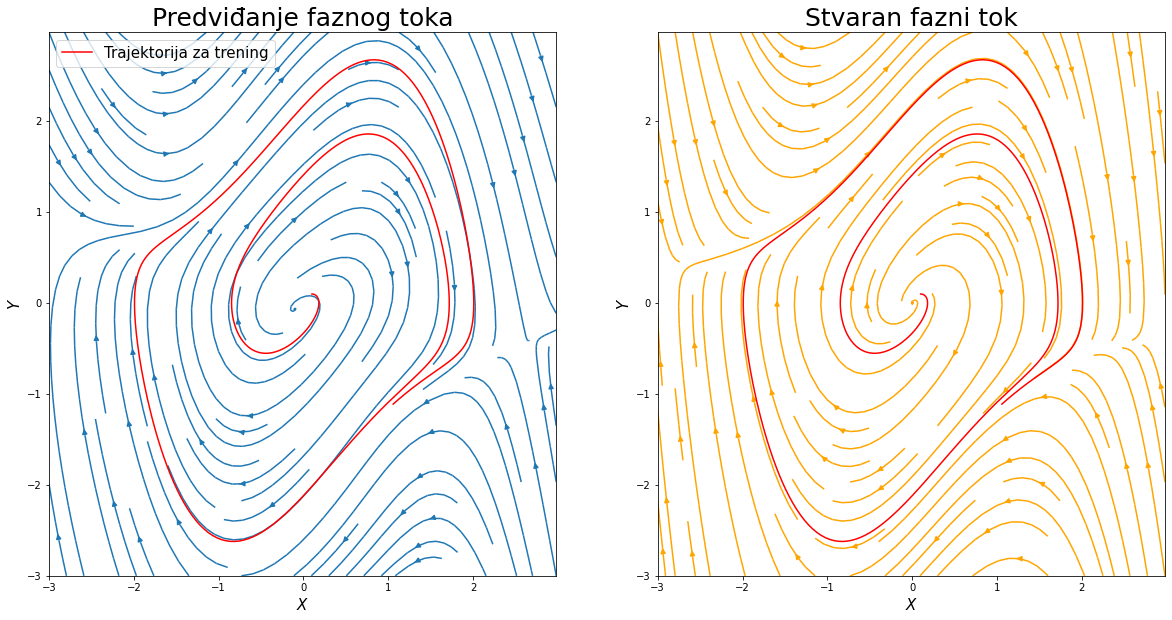

In [144]:
x_mesh = arange(-3,3,6/300)
y_mesh = arange(-3,3,6/300)
u = zeros((len(x_mesh),len(x_mesh)))
v = zeros((len(x_mesh),len(x_mesh)))

data =[]
for i in range(len(x_mesh)):
    for j in range(len(y_mesh)):
        data.append([x_mesh[j],y_mesh[i]])   
        
        
data = array(data)
pred = model2.predict(data)
pred =pred.reshape(300,300,2)


for i in range(len(x_mesh)):
    for j in range(len(y_mesh)):
        u[j,i],v[j,i] = vector_field(x_mesh[i],y_mesh[j])


frame,fig = plt.subplots(1,2,figsize = (20,10))
fig[0].streamplot(x_mesh,y_mesh,pred[:,:,0],pred[:,:,1],density = 1)
fig[1].streamplot(x_mesh,y_mesh,u,v,density = 1,color ="orange")
fig[0].set_title("Predviđanje faznog toka",fontsize = 25)
fig[1].set_title("Stvaran fazni tok",fontsize = 25)
fig[0].set_xlabel(r"$X$",fontsize = 15)
fig[0].set_ylabel(r"$Y$",fontsize = 15)
fig[1].set_xlabel(r"$X$",fontsize = 15)
fig[1].set_ylabel(r"$Y$",fontsize = 15)
print()
#fig[0].plot(X,Y)
fig[0].plot(X_train[:,0],X_train[:,1],color ="red",label ="Trajektorija za trening")

fig[1].plot(X_train[:,0],X_train[:,1],color = "red")
fig[0].legend(fontsize = 15)
frame.savefig("Krivulje_usporedba")